In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
sys.path.append("../ComSub")
from ECI  import *
import re
from collections import defaultdict, Counter
p1 = re.compile(r'[<](.*?)[>]', re.S)  #最小匹配

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Posts_phys.csv")

In [3]:
data.head()

,PostTypeId,Id,OwnerUserId,CreationDate,AcceptedAnswerId,Tags,ParentId,Score,CommentCount,ViewCount,AnswerCount,FavoriteCount
0,1,1,7.0,2010-11-02T18:59:01.140,5.0,<quantum-mechanics><particle-physics><angular-...,NaN,68,5,12383.0,4.0,23.0
1,1,2,23.0,2010-11-02T19:09:48.680,5704.0,<particle-physics><string-theory>,NaN,27,3,2276.0,4.0,8.0
2,1,3,40.0,2010-11-02T19:11:05.857,180.0,<particle-physics><group-theory><representatio...,NaN,32,5,2113.0,3.0,12.0
3,2,4,20.0,2010-11-02T19:12:26.543,NaN,NaN,1.0,19,2,NaN,NaN,NaN
4,2,5,13.0,2010-11-02T19:15:20.813,NaN,NaN,1.0,42,0,NaN,NaN,NaN


存在的关系
- 提问者-问题 
- 回答者-问题
- 回答者-tag的关系

In [55]:
#找到所有的问题和回答
Question = data[data.PostTypeId==1]
Answer = data[data.PostTypeId==2]

In [56]:
Question =  Question.dropna(subset=["OwnerUserId"])
Answer =  Answer.dropna(subset=["OwnerUserId","ParentId"])

In [5]:
#所有问题的标签
Qid_tags =  {Question.Id[i]:p1.findall(Question.Tags[i]) for i in Question.index}

In [6]:
# 所有标签的列表
taglist = list(set([t for i in Qid_tags for t in Qid_tags[i]]))
dtag = dict(zip(taglist,range(len(taglist))))

In [9]:
AnswerUserTag = defaultdict(lambda:defaultdict(lambda: 0))
for i in Answer.index:
    user = Answer.OwnerUserId[i]
    qid = int(Answer.ParentId[i])
    for tag in Qid_tags[qid]:
        AnswerUserTag[user][tag]+=1


In [11]:
user_tag = [[user,tag,AnswerUserTag[user][tag]] for user in AnswerUserTag for tag in  AnswerUserTag[user]]

In [12]:
x = [a for a,b,c in user_tag]
y = [b for a,b,c in user_tag]
z = [c for a,b,c in user_tag]

In [8]:
def get_dict(lst):
    return dict(zip(list(set(lst)),range(len(set(lst)))))

In [14]:
dx = get_dict(x)
dy = get_dict(y)
xlist = [dx[a] for a in x]
ylist = [dy[b] for b in y]

In [15]:
from scipy import sparse
nx,ny=len(dx),len(dy)
M = sparse.csc_matrix((z,(xlist,ylist)),shape=(nx,ny))

In [16]:
R = RCA_sparse(M)
D = Get_eci_pci_sparse(R)

/home/hachi/soft/anaconda3/lib/python3.6/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


==Time 5.54==
==Time 0.61==


/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


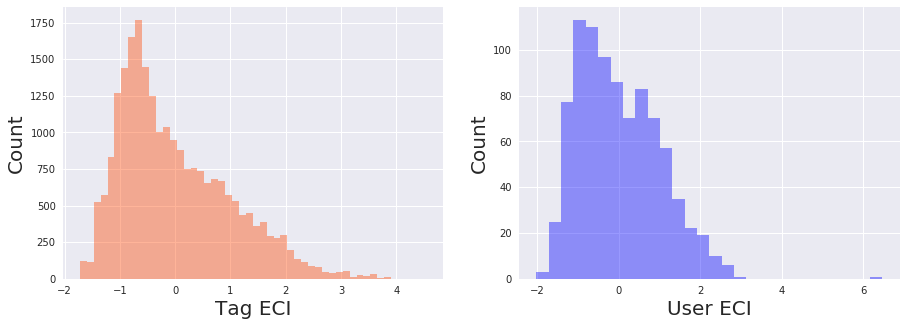

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(D['eci'],kde=False,color="orangered",)
plt.xlabel('Tag ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(122)
sns.distplot(D['pci'],kde=False,color="blue",)
plt.xlabel('User ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [20]:
res = [(key,D['pci'][dy[key]]) for key in dy]
Res = sorted(res,key=lambda  x:x[1],reverse=True)
Res[:20]

[('quantum-error-correction', 6.463757587406006),
 ('wightman-fields', 3.1221173276601557),
 ('affine-lie-algebra', 2.7604364301223114),
 ('superspace-formalism', 2.5609769899897366),
 ('hopf-algebra', 2.5479013559563892),
 ('large-n', 2.5469820986174585),
 ('algebraic-topology', 2.5359186633548076),
 ('amplituhedron', 2.5287466772888822),
 ('sigma-models', 2.509364795728366),
 ('string-field-theory', 2.5078306313353957),
 ('calabi-yau', 2.3875774723484313),
 ('topological-defects', 2.3825007427470193),
 ('skyrmion', 2.3471149233650976),
 ('brst', 2.337258295839195),
 ('research-level', 2.318269948226802),
 ('chern-simons-theory', 2.295191312877839),
 ('conformal-field-theory', 2.2712342113573136),
 ('supersymmetry', 2.259894261726986),
 ('superconformality', 2.202146681393486),
 ('non-commutative-geometry', 2.1460540774262284)]

In [21]:
Res[-20:]

[('aircraft', -1.4849019487784325),
 ('drag', -1.4908179351006456),
 ('water', -1.4932421937930933),
 ('humidity', -1.4959362367879152),
 ('contact-mechanics', -1.5064492044506128),
 ('lift', -1.5126116773212541),
 ('bernoulli-equation', -1.519761641215827),
 ('electricity', -1.5630536315786485),
 ('electrical-resistance', -1.5664219316478258),
 ('pressure', -1.5667629124821623),
 ('everyday-life', -1.569747586758764),
 ('fluid-dynamics', -1.58655597644066),
 ('aerodynamics', -1.5993249714654507),
 ('free-body-diagram', -1.6276451137277257),
 ('electric-circuits', -1.6570894398813871),
 ('forces', -1.6647246212371227),
 ('friction', -1.6655668624242979),
 ('telescopes', -1.8129050499919719),
 ('newtonian-mechanics', -1.8295065452467145),
 ('fracture', -2.0250594259890464)]

# 利用userid-questionid

In [80]:
XY = [[int(Answer.OwnerUserId[i]), int(Answer.ParentId[i])] for i in Answer.index]

In [81]:
x = [i  for  i,j  in XY]
y = [j  for  i,j  in XY]

In [84]:
Cx = Counter(x)
Cy= Counter(y)

/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


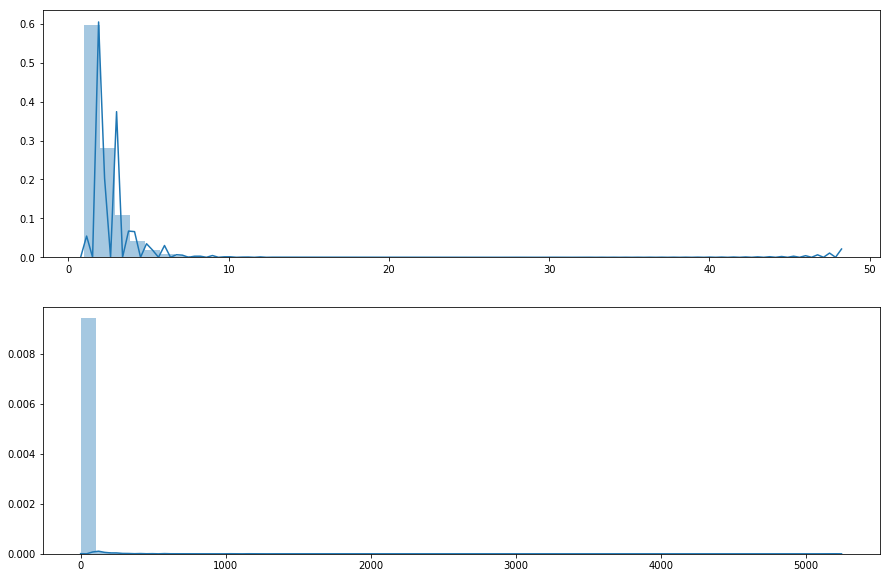

In [87]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.distplot(list(Cy.values()))
plt.subplot(212)
sns.distplot(list(Cx.values()))

In [102]:
removex = [i for i in Cx if Cx[i]<=1]
removey = [i for i in Cy if Cy[i]<=3]
XY2 = []
n=0
N=len(XY1)
for xi,yi in XY1:
    if xi not in removex and yi not in removey:
        XY2.append([xi,yi])
    n+=1
    if n%1000==0:
        print(n*1.0/N,end='\r')

In [103]:
x = [i  for  i,j  in XY2]
y = [j  for  i,j  in XY2]
dx = get_dict(x)
dy = get_dict(y)
xlist = [dx[a] for a in x]
ylist = [dy[b] for b in y]

In [104]:
len(dx),len(dy)

(4553, 6696)

In [105]:
@timelogger
def RCA_sparse(M):
    B = sparse.csc_matrix(M.sum(1)*M.sum(0))
    Sum = M.sum()
    R = sparse.lil_matrix(M*Sum/B)
    del B
    del Sum
    R[R>=1]=1
    R[R<1]=0
    R = R.tocsc()
    return R

In [106]:
nx,ny=len(dx),len(dy)
M = sparse.csc_matrix(([1.]*len(xlist),(xlist,ylist)),shape=(nx,ny))

In [107]:
R = RCA_sparse(M)
#D = Get_eci_pci_sparse(R)

/home/hachi/soft/anaconda3/lib/python3.6/site-packages/scipy/sparse/compressed.py:274: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


==Time 16.88==


In [115]:
D = Get_eci_pci_sparse(M)

==Time 1.48==


/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hachi/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


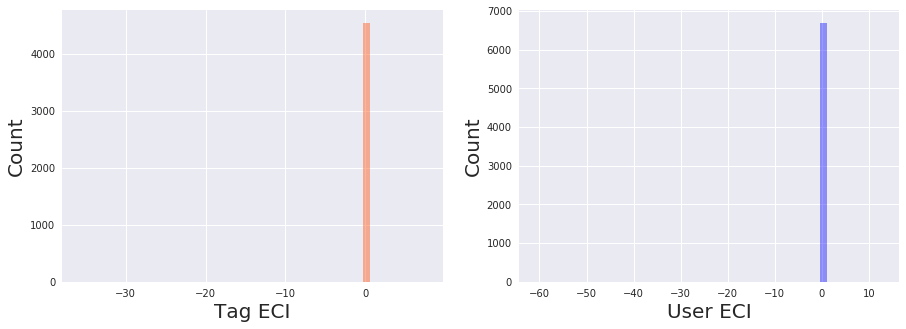

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(D['eci'],kde=False,color="orangered",)
plt.xlabel('Tag ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(122)
sns.distplot(D['pci'],kde=False,color="blue",)
plt.xlabel('User ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [128]:
SD =  sorted([[i,k]  for i,k in zip(range(len(D['pci'])),D['pci'])],key=lambda x:x[1])

In [129]:
SD[:3]

[[2901, -56.624613014701076],
 [5714, -13.949542486314687],
 [576, 0.001703473237245716]]

In [131]:
SD[-3:]

[[5415, 0.0017034732375369305],
 [6579, 1.8002757509241736],
 [4564, 57.37423684539847]]

In [134]:
qid = [i for i in dy.keys()]
qid2 = [dy[i] for i in qid]

In [136]:
id2origin=dict(zip(qid2,qid))

In [137]:
[id2origin[i] for i,j  in SD[:3]]

[242126, 27590, 165950]

In [138]:
[id2origin[i] for i,j  in SD[-3:]]

[222204, 261603, 86924]